<a href="https://colab.research.google.com/github/abasnezhad/Kaggle/blob/main/Football_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
 df= pd.read_csv("EPL_20_21.csv")

In [4]:
df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [6]:
df.describe()

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,25.500000,19.535714,15.714286,1411.443609,1.853383,1.287594,717.750000,77.823872,0.191729,0.234962,0.113289,0.072650,2.114662,0.090226
std,4.319404,11.840459,11.921161,1043.171856,3.338009,2.095191,631.372522,13.011631,0.850881,0.975818,0.148174,0.090072,2.269094,0.293268
min,16.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,9.000000,4.000000,426.000000,0.000000,0.000000,171.500000,73.500000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
50%,26.000000,21.000000,15.000000,1345.000000,1.000000,0.000000,573.500000,79.200000,0.000000,0.000000,0.060000,0.050000,2.000000,0.000000
75%,29.000000,30.000000,27.000000,2303.500000,2.000000,2.000000,1129.500000,84.625000,0.000000,0.000000,0.150000,0.110000,3.000000,0.000000
max,38.000000,38.000000,38.000000,3420.000000,23.000000,14.000000,3214.000000,100.000000,9.000000,10.000000,1.160000,0.900000,12.000000,2.000000


In [7]:
# number of null values 
df.isna().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [8]:
#adding min/match

df['mins/match']=(df['Mins']/df['Matches']).astype(int)

In [10]:
#total goals and total penalty goals
total_goal= df['Goals'].sum()
penalty_goal= df['Penalty_Goals'].sum()
total_goal, penalty_goal

(986, 102)

In [11]:
#total penalty
total_penalty= df['Penalty_Attempted'].sum()
total_penalty

125

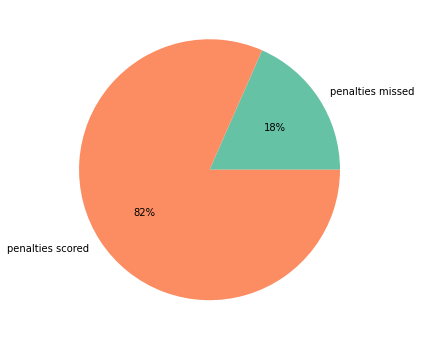

In [12]:
# pie chart for penalties missed vs scored
plt.figure(figsize=(13,6))
pl_not_scored=total_penalty-penalty_goal
data=[pl_not_scored, penalty_goal ]
labels= ['penalties missed', "penalties scored"]
colors= sns.color_palette('Set2')
plt.pie(data, labels=labels, colors= colors, autopct= '%.0f%%')
plt.show()


In [13]:
#unique positions
unique_positions= df.Position.unique()
unique_positions

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [14]:
# total number of FW players

total_FWplayers= df[df['Position']=='FW']
total_FWplayers

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,mins/match,goal/match
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0


In [15]:
#number of nationality

Unique_nationalities = df.Nationality.unique()

number_of_nationality= len(Unique_nationalities)
number_of_nationality

59

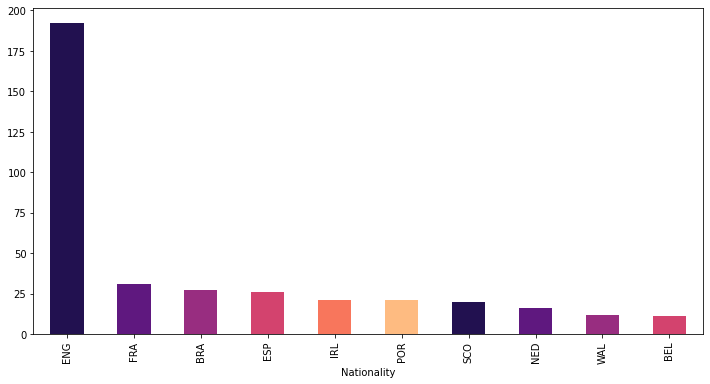

In [16]:
# bar chart of nationalities
nationalities= df.groupby('Nationality').size().sort_values(ascending=False )

nationalities.head(10).plot(kind='bar', figsize=(12,6), color=sns.color_palette('magma'))



In [17]:
#main nationality

nationalities.index[0], nationalities[0]

('ENG', 192)

In [18]:
# 5 clubs with maximum players 
df['Club'].value_counts().nlargest(5)

West Bromwich Albion    30
Manchester United       29
Arsenal                 29
Southampton             29
Everton                 29
Name: Club, dtype: int64

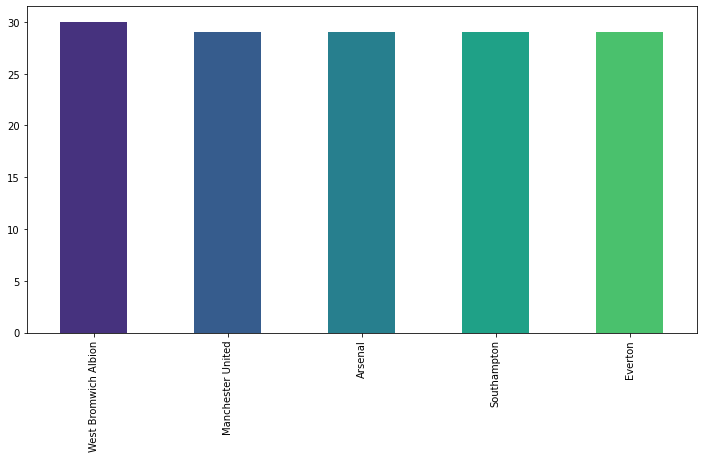

In [19]:
# clubs with maximum players chart
df['Club'].value_counts().nlargest(5).plot(kind= 'bar', figsize= (12,6), color=sns.color_palette('viridis'))

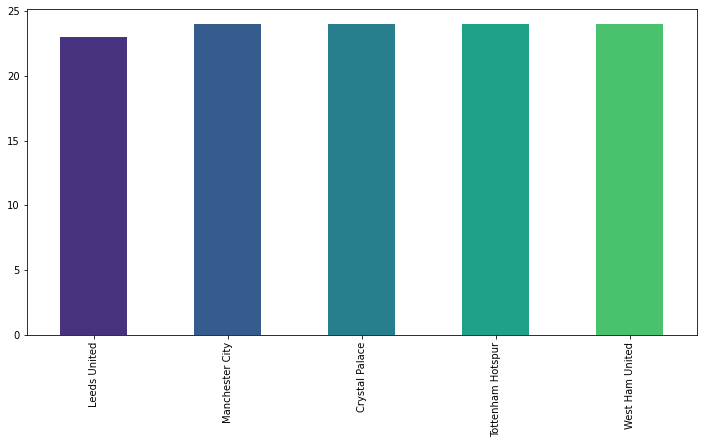

In [20]:
#  clubs with least players chart

df['Club'].value_counts().nsmallest(5).plot(kind='bar', figsize=(12,6), color=sns.color_palette('viridis'))

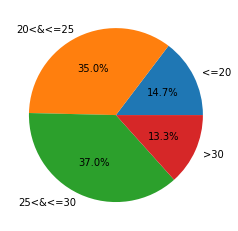

In [21]:
# players grouped by age

under_20= df[df['Age']<=20]
age20_25= df[(20< df['Age']) & (df['Age']<= 25)]
age25_30=df[(25< df['Age']) & (df['Age']<= 30)]
above_30= df[df['Age']>30]

x=np.array([under_20['Name'].count(), age20_25['Name'].count(), age25_30['Name'].count(), above_30['Name'].count()])
labels=['<=20', '20<&<=25', '25<&<=30', '>30']
plt.pie (x, labels= labels, autopct="%.1f%%" )
plt.show()

In [25]:
# total under 20 players in each club
# players_under_20= df[df['Age']<=20]['Club'].value_counts()
players_under_20= df[df['Age']<=20].groupby('Club').size().sort_values(ascending=False )
players_under_20



Club
Wolverhampton Wanderers    8
Southampton                7
Manchester United          7
Leeds United               6
Sheffield United           6
Arsenal                    5
Everton                    4
Leicester City             4
Manchester City            4
Brighton                   4
Liverpool FC               4
Aston Villa                3
Chelsea                    3
Newcastle United           3
Burnley                    3
Fulham                     2
West Bromwich Albion       2
Crystal Palace             1
Tottenham Hotspur          1
West Ham United            1
dtype: int64

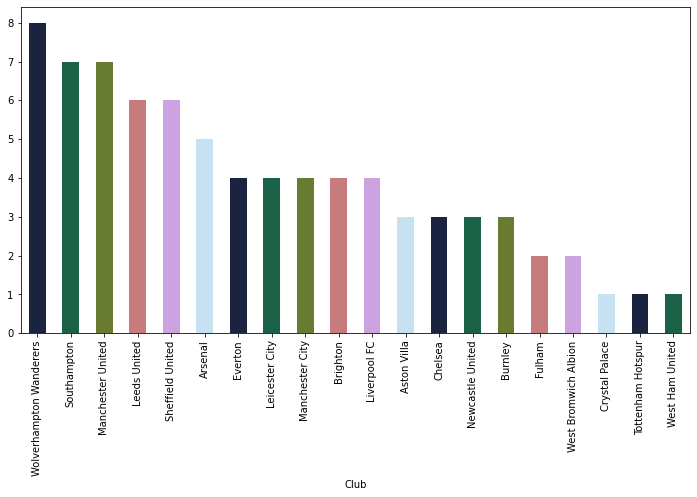

In [26]:
# chart of total under 20 players in each club
players_under_20.plot(kind= 'bar', figsize= (12,6), color= sns.color_palette('cubehelix'))

In [27]:
# players under 20 at ManU
manu_under20= len(df[(df['Age']<=20) & (df['Club']=='Manchester United')])
manu_under20

7

In [28]:
# avrage age of players in each clubs
ave_age= df.groupby(['Club'])["Age"].mean().sort_values(ascending=False )
ave_age

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
Name: Age, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

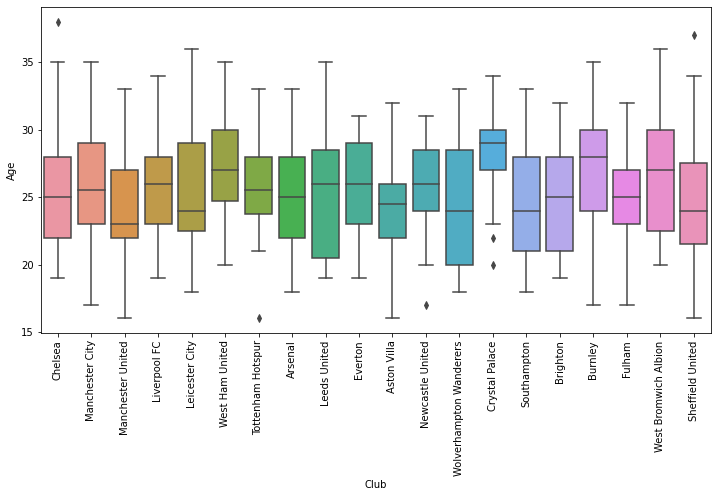

In [29]:
# plot  avrage age of players in each clubs

plt.figure(figsize= (12,6))
sns.boxplot(x='Club', y='Age', data= df)
plt.xticks(rotation= 90)

In [30]:
# total assists for each clubs 
assists_club= df.groupby(['Club'])["Assists"].sum().sort_values(ascending=False )
assists_club

Club
Manchester City            55
Manchester United          51
Tottenham Hotspur          50
West Ham United            46
Leeds United               45
Leicester City             45
Liverpool FC               43
Aston Villa                38
Arsenal                    38
Chelsea                    38
Southampton                33
Everton                    32
Crystal Palace             29
Newcastle United           26
Brighton                   24
Wolverhampton Wanderers    21
Burnley                    20
West Bromwich Albion       20
Fulham                     18
Sheffield United           13
Name: Assists, dtype: int64

Text(0.5, 1.0, 'total assists of each club')

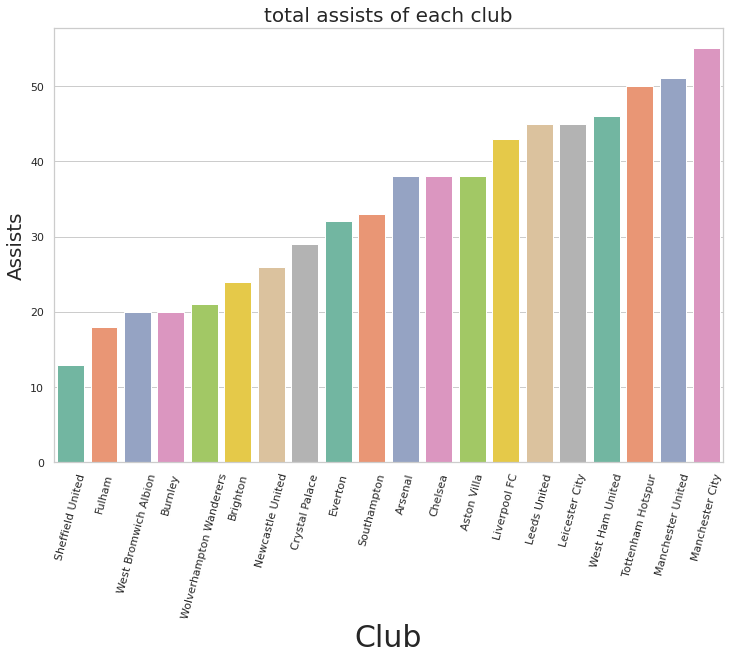

In [52]:
# plot for total assists for each clubs 

assists_club_df= pd.DataFrame(df.groupby(['Club'], as_index=False)["Assists"].sum())
sns.set_theme(style='whitegrid', color_codes= True)
ax= sns.barplot(x= 'Club', y='Assists', data= assists_club_df.sort_values(by="Assists"), palette= 'Set2')
ax.set_xlabel('Club', fontsize=30)
ax.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize']=(12,8)
plt.title ('total assists of each club', fontsize=20)

In [41]:
# top 10 assists 
top10_assists= df[['Name', 'Club', 'Assists', 'Matches']].nlargest(10, columns='Assists')
top10_assists

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


Text(0.5, 1.0, 'goals og each clubs')

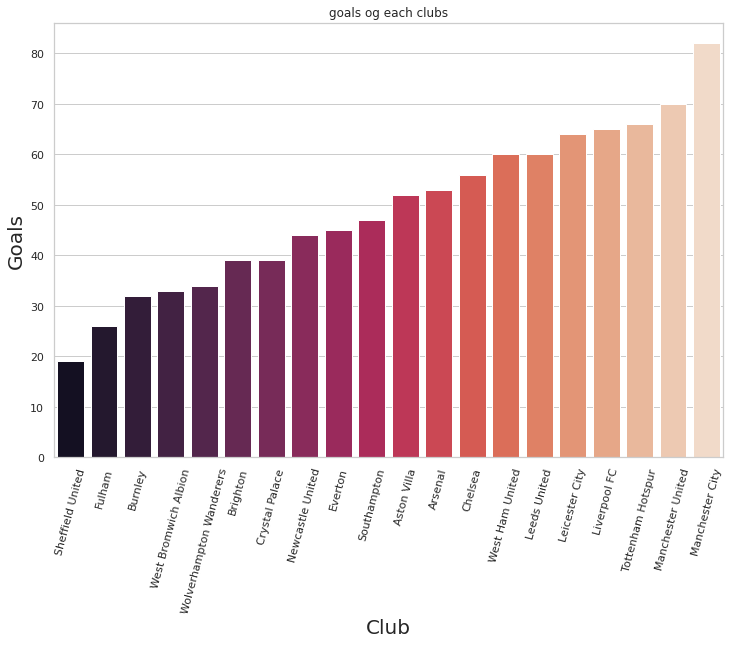

In [62]:
# goals by clubs
goals_club= pd.DataFrame(df.groupby(['Club'], as_index=False)['Goals'].sum())
sns.set_theme(style='whitegrid', color_codes= True)
ax=sns.barplot(x='Club', y='Goals', data= goals_club.sort_values(by= 'Goals'), palette= 'rocket' )
ax.set_xlabel("Club", fontsize=20)
ax.set_ylabel('Goals', fontsize= 20)
plt.xticks(rotation=75)
plt.rcParams['figure.figsize']=(12,6)
plt.title('goals og each clubs')

In [65]:
# top 10 players with most goals

top10_PlayerByGoal= df[['Name', 'Goals', 'Club', 'Matches']].nlargest(10, columns='Goals')
top10_PlayerByGoal

,Name,Goals,Club,Matches
162,Harry Kane,23,Tottenham Hotspur,35
81,Mohamed Salah,22,Liverpool FC,37
51,Bruno Fernandes,18,Manchester United,37
161,Son Heung-min,17,Tottenham Hotspur,37
214,Patrick Bamford,17,Leeds United,38
237,Dominic Calvert-Lewin,16,Everton,33
110,Jamie Vardy,15,Leicester City,34
267,Ollie Watkins,14,Aston Villa,37
33,İlkay Gündoğan,13,Manchester City,28
191,Alexandre Lacazette,13,Arsenal,31


In [70]:
#top10 goals per match
df['goal/match']=(df['Goals']/df['Matches']).astype(float)
top10_goals_match= df[['Name', 'Matches', 'goal/match','Goals']].nlargest(10, columns='goal/match')
top10_goals_match

,Name,Matches,goal/match,Goals
162,Harry Kane,35,0.657143,23
81,Mohamed Salah,37,0.594595,22
307,Joe Willock,14,0.571429,8
145,Jesse Lingard,16,0.562500,9
175,Gareth Bale,20,0.550000,11
74,Anthony Elanga,2,0.500000,1
51,Bruno Fernandes,37,0.486486,18
237,Dominic Calvert-Lewin,33,0.484848,16
120,Kelechi Iheanacho,25,0.480000,12
92,Diogo Jota,19,0.473684,9


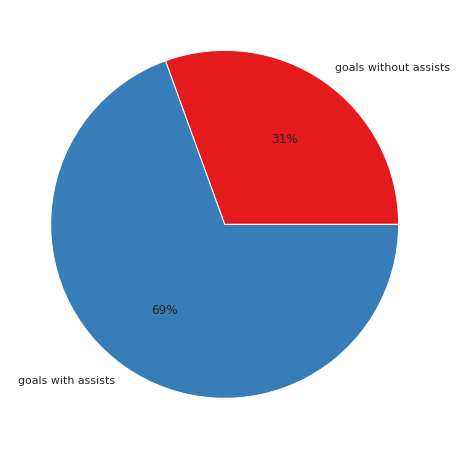

In [81]:
#pie chart of goals with assist and without
plt.figure(figsize=(12,8))
assists=df['Assists'].sum()
data=[total_goal-assists, assists]
labels=['goals without assists', 'goals with assists' ]
color=sns.color_palette('Set1')
plt.pie(data, labels=labels, colors= color, autopct='%.0f%%')
plt.show()

[Text(0, 0, 'John McGinn'),
 Text(0, 0, 'Harry Maguire'),
 Text(0, 0, 'Conor Gallagher'),
 Text(0, 0, 'Kalvin Phillips'),
 Text(0, 0, 'Douglas Luiz'),
 Text(0, 0, 'Pierre Højbjerg'),
 Text(0, 0, 'Mason Holgate'),
 Text(0, 0, 'John Lundstram'),
 Text(0, 0, 'Luka Milivojević'),
 Text(0, 0, 'Rúben Neves')]

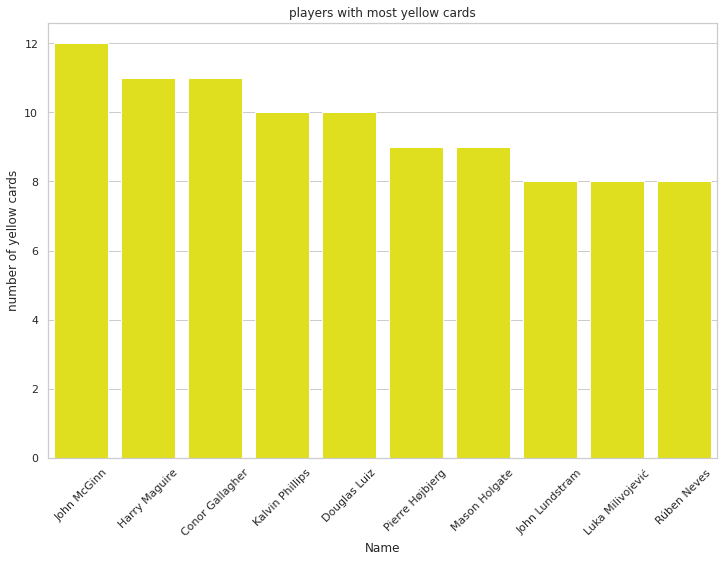

In [104]:
# top 10 players with most yellow cards

most_yellow_cards= df.sort_values(by='Yellow_Cards', ascending=False)[:10]
plt.figure(figsize=(12,8))
plt.title("players with most yellow cards")
c=sns.barplot(x=most_yellow_cards['Name'], y= most_yellow_cards['Yellow_Cards'], label='Players', color='yellow')
plt.ylabel('number of yellow cards')
c.set_xticklabels(c.get_xticklabels(), rotation=45)